# KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

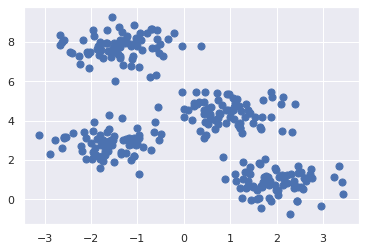

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]]


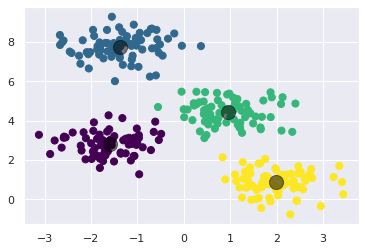

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
# Initialize yourself

In [6]:
class KMeans:
    
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        np.random.seed(777)
        if self.method == 'random':
            return X[np.random.randint(0, X.shape[0]-1, self.k)]
        if self.method == 'k-means++':
            centroids = [X[np.random.randint(0, X.shape[0]-1, 1)]]
            for _ in range(self.k-1):
                md = []
                for i in X:
                    tmp = [np.linalg.norm(i - a)**2 for a in centroids]
                    md.append(min(tmp))
                centroids.append(X[np.argmax(md)])              
            return centroids
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if (new_centroids == self.centroids).all():
                return
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        clusters = []
        for i in X:
            tmp = [np.linalg.norm(i-c) for c in centroids]
            clusters.append(np.argmin(tmp))
        return np.array(clusters)

    def maximization(self, X, clusters):
        new_centroids = self.centroids.copy()
        for i in range(len(new_centroids)):
            c = (X[clusters==i]).mean(axis=0)
            new_centroids[i] = c
        return new_centroids
        
    def predict(self, X):
        predictions = self.expectation(X, self.centroids)
        return np.array(predictions)
    
    def softmax(self, vector):
        return np.exp(vector) / np.exp(vector).sum()
    
    def predict_proba(self, X):
        probas = []
        centroids = self.centroids.copy()
        for i in X:
            probas.append(self.softmax([np.linalg.norm(i-c) for c in centroids]))
        return np.array(probas)
    
    @property
    def centroids_(self):
        return self.centroids

In [7]:
kmeans = KMeans(k=4, method='random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# print(y_kmeans)
probas = kmeans.predict_proba(X)
# probas

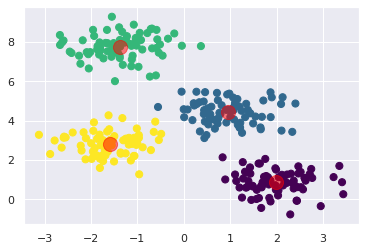

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = np.array(kmeans.centroids_)
# print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);